In [49]:
import pandas as pd
import datetime as dt
import seaborn as sns
from matplotlib import pyplot as plt
from RandomForestForTimeSeriesRegressor import RandomForestForTimeSeriesRegressor, BLOCK_TYPES
from pyts.classification import TimeSeriesForest

In [50]:
dataset = pd.read_csv('../../datasets/sp_500_stocks/sp500_stocks.csv') #, nrows=1000000)

In [51]:
dataset = dataset.dropna()
dataset

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
22524,2010-01-04,AMD,9.700000,9.700000,9.900000,9.680000,9.790000,18748700.0
22525,2010-01-05,AMD,9.710000,9.710000,9.900000,9.680000,9.710000,22145700.0
22526,2010-01-06,AMD,9.570000,9.570000,9.760000,9.550000,9.680000,18643400.0
22527,2010-01-07,AMD,9.470000,9.470000,9.550000,9.180000,9.510000,26806800.0
22528,2010-01-08,AMD,9.430000,9.430000,9.470000,9.290000,9.370000,13752800.0
...,...,...,...,...,...,...,...,...
1880749,2024-11-25,ZBRA,400.940002,400.940002,404.320007,398.130005,400.029999,420200.0
1880750,2024-11-26,ZBRA,402.450012,402.450012,403.570007,399.690002,402.440002,369200.0
1880751,2024-11-27,ZBRA,405.750000,405.750000,406.140015,400.929993,403.730011,258300.0
1880752,2024-11-29,ZBRA,407.000000,407.000000,409.029999,405.510010,406.640015,175700.0


In [53]:
dataset = dataset.sort_values("Date")
dataset

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
22524,2010-01-04,AMD,9.700000,9.700000,9.900000,9.680000,9.790000,18748700.0
37540,2010-01-04,APD,53.128727,76.928772,77.021278,75.587418,75.957443,1131483.0
1152478,2010-01-04,MKC,13.617592,18.150000,18.205000,18.030001,18.205000,980000.0
255272,2010-01-04,BKNG,222.359650,223.960007,225.300003,221.580002,222.320007,863200.0
469250,2010-01-04,CPRT,2.275625,2.275625,2.308750,2.271875,2.295625,4688000.0
...,...,...,...,...,...,...,...,...
874681,2024-12-02,HLT,250.470001,250.470001,254.335007,249.606293,253.440002,805471.0
889697,2024-12-02,HRL,32.139999,32.139999,32.480000,31.850000,32.480000,3019392.0
893451,2024-12-02,HST,18.389999,18.389999,18.590000,18.270000,18.490000,4656098.0
814617,2024-12-02,GM,55.040001,55.040001,55.619999,54.689999,55.500000,9200689.0


In [57]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Date'] = dataset['Date'].map(dt.datetime.toordinal)
dataset

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
22524,733776,AMD,9.700000,9.700000,9.900000,9.680000,9.790000,18748700.0
37540,733776,APD,53.128727,76.928772,77.021278,75.587418,75.957443,1131483.0
1152478,733776,MKC,13.617592,18.150000,18.205000,18.030001,18.205000,980000.0
255272,733776,BKNG,222.359650,223.960007,225.300003,221.580002,222.320007,863200.0
469250,733776,CPRT,2.275625,2.275625,2.308750,2.271875,2.295625,4688000.0
...,...,...,...,...,...,...,...,...
874681,739222,HLT,250.470001,250.470001,254.335007,249.606293,253.440002,805471.0
889697,739222,HRL,32.139999,32.139999,32.480000,31.850000,32.480000,3019392.0
893451,739222,HST,18.389999,18.389999,18.590000,18.270000,18.490000,4656098.0
814617,739222,GM,55.040001,55.040001,55.619999,54.689999,55.500000,9200689.0


In [58]:
dataset = dataset.drop(columns=['Adj Close', "Volume"])
dataset = dataset.loc[(dataset['Symbol'] == "AAPL") | (dataset['Symbol'] == "JNJ") | (dataset['Symbol'] == "JPM") | (dataset['Symbol'] == "XOM") | (dataset['Symbol'] == "PG") | (dataset['Symbol'] == "HD") | (dataset['Symbol'] == "T") | (dataset['Symbol'] == "UNP") | (dataset['Symbol'] == "DUK") | (dataset['Symbol'] == "AMT") | (dataset['Symbol'] == "MDLZ")]
dataset

,Date,Symbol,Close,High,Low,Open
108866,733776,AMT,43.459999,43.889999,43.279999,43.490002
1006072,733776,JPM,42.849998,42.990002,41.669998,41.790001
1006073,733777,JPM,43.680000,43.840000,42.779999,42.790001
108867,733777,AMT,44.180000,44.250000,43.400002,43.500000
1006074,733778,JPM,43.919998,44.090000,43.310001,43.450001
...,...,...,...,...,...,...
1009823,739217,JPM,249.789993,251.190002,248.770004,249.350006
1009824,739219,JPM,249.720001,251.770004,249.449997,249.860001
112618,739219,AMT,209.000000,209.770004,207.529999,209.300003
112619,739222,AMT,207.330002,208.509995,205.710007,207.539993


In [59]:
from sklearn import preprocessing

dataset['Symbol'] = pd.factorize(dataset.Symbol)[0]
# symbols = new_df[['SymbolFac', 'Symbol']].copy()
# Y = new_df.pop("Symbol")
# min_max_scaler = preprocessing.MinMaxScaler()
# scaled_data = min_max_scaler.fit_transform(new_df)
# normalized_dataset = pd.DataFrame(scaled_data)
# dataset_X = dataset[['Date', 'Symbol']].copy()
# dataset_Y = dataset.drop(['Date', 'Symbol'], axis=1)
#
dataset

,Date,Symbol,Close,High,Low,Open
108866,733776,0,43.459999,43.889999,43.279999,43.490002
1006072,733776,1,42.849998,42.990002,41.669998,41.790001
1006073,733777,1,43.680000,43.840000,42.779999,42.790001
108867,733777,0,44.180000,44.250000,43.400002,43.500000
1006074,733778,1,43.919998,44.090000,43.310001,43.450001
...,...,...,...,...,...,...
1009823,739217,1,249.789993,251.190002,248.770004,249.350006
1009824,739219,1,249.720001,251.770004,249.449997,249.860001
112618,739219,0,209.000000,209.770004,207.529999,209.300003
112619,739222,0,207.330002,208.509995,205.710007,207.539993


In [60]:
trainPercent = 80
trainSamples = (len(dataset.index) // 100) * trainPercent
testSamples = len(dataset.index) - trainSamples

In [61]:
aux = dataset.copy()

X = aux[['Date', 'Symbol']].copy()
aux = aux.drop(['Date', 'Symbol'], axis=1)

Y = aux.copy()
#dataset = aux

X_train = X.iloc[:trainSamples]
Y_train = Y.iloc[:trainSamples]
X_test = X.iloc[-testSamples:]
Y_test = Y.iloc[-testSamples:]

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=1)
#
#X_train = X_train.values.reshape(-1, 1)
#X_test = X_test.values.reshape(-1, 1)
X_train

,Date,Symbol
108866,733776,0
1006072,733776,1
1006073,733777,1
108867,733777,0
1006074,733778,1
...,...,...
111863,738123,0
1009070,738124,1
111864,738124,0
1009071,738125,1


In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

basicRFPrecision = []
for i in range(50):
    basicRF = RandomForestRegressor(n_jobs=100, n_estimators=500, max_depth=10)
    basicRF.fit(X_train, Y_train)
    y_pred = basicRF.predict(X_test)
    rmse0 = sqrt(mean_squared_error(Y_test, y_pred))
    print(f"RMSE:")
    print(rmse0)
    basicRFPrecision.append(rmse0)

RMSE:
46.67132242036047
RMSE:
46.6867840028201
RMSE:
46.64307273702807
RMSE:
46.728923171383485
RMSE:
46.61652319719522
RMSE:
46.70196660113683
RMSE:
46.68085717074292
RMSE:
46.63275815262809
RMSE:
46.64908208995815
RMSE:
46.67146462791114
RMSE:
46.67671501994988
RMSE:
46.67797978185627
RMSE:
46.67645213965288
RMSE:
46.67679122368273
RMSE:
46.66062941297982
RMSE:
46.67040340045659
RMSE:
46.663046755452086
RMSE:
46.71783731150498
RMSE:
46.68250489817406
RMSE:
46.65517825353793
RMSE:
46.65004495598729
RMSE:
46.72627460341883
RMSE:
46.669764114831416
RMSE:
46.641491476482024
RMSE:
46.71079058659527
RMSE:
46.72433147317425
RMSE:
46.712352065662934
RMSE:
46.5996498857638
RMSE:
46.68129583667045
RMSE:
46.68875482714095
RMSE:
46.63398656297049
RMSE:
46.69400446073759
RMSE:
46.67085765325024
RMSE:
46.64741302100919
RMSE:
46.61901602076908
RMSE:
46.64525454342049
RMSE:
46.64158551290048
RMSE:
46.72718299206217
RMSE:
46.647822479077526
RMSE:
46.672410332083096
RMSE:
46.62667258770797
RMSE:
46.62

In [64]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [71]:
precisionNonOverlapping = dict()
for i in [100, 200, 300]:
    precisionNonOverlapping[i] = []
    block_size = i #int(count_row // i)
    for k in range(10):
        rfts = RandomForestForTimeSeriesRegressor(n_jobs=100, n_estimators=500, block_size=block_size, max_depth=10)
        rfts.fit(X_train, Y_train)
        y_pred = rfts.predict(X_test)
        rmse0 = sqrt(mean_squared_error(Y_test, y_pred))
        print(f"RMSE: ({i}, {k})")
        print(rmse0)
        precisionNonOverlapping[i].append(rmse0)

RMSE: (100, 0)
51.89071508112134
RMSE: (100, 1)
52.40146660525801
RMSE: (100, 2)
52.015982618494995
RMSE: (100, 3)
52.12309486315037
RMSE: (100, 4)
52.07819370693659
RMSE: (100, 5)
52.94118177222006
RMSE: (100, 6)
51.70108269736087
RMSE: (100, 7)
52.788894095896524
RMSE: (100, 8)
52.20545503800888
RMSE: (100, 9)
51.753250112835644
RMSE: (200, 0)
48.9411966678747
RMSE: (200, 1)
48.30322435440694
RMSE: (200, 2)
48.4260582508875
RMSE: (200, 3)
48.78561382605203
RMSE: (200, 4)
47.953225618757706
RMSE: (200, 5)
48.705261944146855
RMSE: (200, 6)
48.372240807634775
RMSE: (200, 7)
48.47905619851489
RMSE: (200, 8)
48.83354229224876
RMSE: (200, 9)
48.76747012255785
RMSE: (300, 0)
45.28109714981679
RMSE: (300, 1)
45.26695888509442
RMSE: (300, 2)
45.31411893382207
RMSE: (300, 3)
45.07452504785887
RMSE: (300, 4)
45.869090111719444
RMSE: (300, 5)
45.99760853947084
RMSE: (300, 6)
45.36267921353266
RMSE: (300, 7)
45.55063994143539
RMSE: (300, 8)
46.04878517406321
RMSE: (300, 9)
45.84517157336495


([<matplotlib.axis.XTick at 0x28ea899ab50>,
 [Text(0, 0, '100'),
  Text(1, 0, '200'),
  Text(2, 0, '300'),
  Text(3, 0, 'Random Forest')])

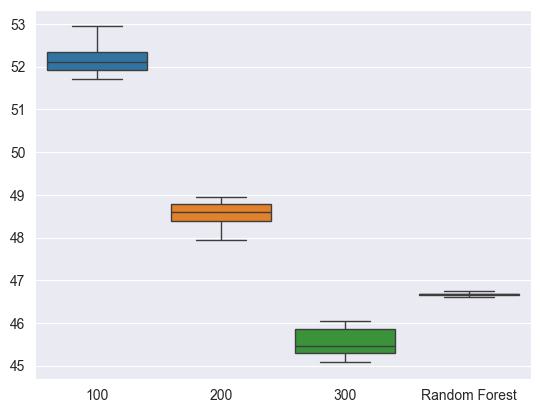

In [72]:
data1 = []
for r in precisionNonOverlapping[100]:
    data1.append(r)
data2 = []
for r in precisionNonOverlapping[200]:
    data2.append(r)
data3 = []
for r in precisionNonOverlapping[300]:
    data3.append(r)

all_arr = [data1,
           data2,
           data3,
           basicRFPrecision]
sns.boxplot(data=all_arr)
plt.xticks([0, 1, 2, 3], ["100", "200", "300", "Random Forest"])

In [73]:
precisionNonOverlapping = dict()
for i in [100, 300, 500, 1000, 2000, 3000, 4000, 5000]:
    precisionNonOverlapping[i] = []
    block_size = i #int(count_row // i)
    for k in range(50):
        rfts = RandomForestForTimeSeriesRegressor(n_jobs=100, n_estimators=500, block_size=block_size, max_depth=10)
        rfts.fit(X_train, Y_train)
        y_pred = rfts.predict(X_test)
        rmse0 = sqrt(mean_squared_error(Y_test, y_pred))
        print(f"RMSE: ({i}, {k})")
        print(rmse0)
        precisionNonOverlapping[i].append(rmse0)

RMSE: (100, 0)
52.00006330776655
RMSE: (100, 1)
52.18150015426089
RMSE: (100, 2)
52.09334943765561
RMSE: (100, 3)
52.66082604325323
RMSE: (100, 4)
52.06072886415962
RMSE: (100, 5)
52.36600753788031
RMSE: (100, 6)
52.41476816558058
RMSE: (100, 7)
52.21875861915517
RMSE: (100, 8)
52.60169791070684
RMSE: (100, 9)
52.06476249602902
RMSE: (100, 10)
52.15501931921911
RMSE: (100, 11)
51.92807469815326
RMSE: (100, 12)
51.70315668862497
RMSE: (100, 13)
53.27202125380563
RMSE: (100, 14)
52.147300521755305
RMSE: (100, 15)
52.10780518801472
RMSE: (100, 16)
52.44307709133437
RMSE: (100, 17)
52.23877059163363
RMSE: (100, 18)
52.029445177051784
RMSE: (100, 19)
53.14755886360199
RMSE: (100, 20)
52.205731472281
RMSE: (100, 21)
52.046921228506356
RMSE: (100, 22)
52.036406583892486
RMSE: (100, 23)
52.28843052214592
RMSE: (100, 24)
51.919347009294015
RMSE: (100, 25)
51.943331438711866
RMSE: (100, 26)
51.558725130961044
RMSE: (100, 27)
52.416225074629345
RMSE: (100, 28)
51.528606753838865
RMSE: (100, 29)
5

Text(0, 0.5, 'RMSE')

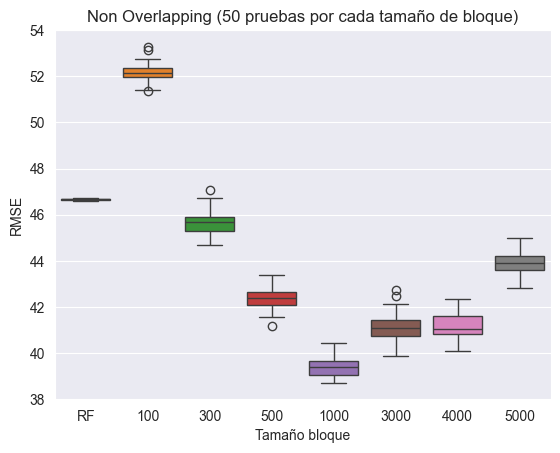

In [74]:
from matplotlib import pyplot as plt

data0 = []
for r in precisionNonOverlapping[100]:
    data0.append(r)
data1 = []
for r in precisionNonOverlapping[300]:
    data1.append(r)
data2 = []
for r in precisionNonOverlapping[500]:
    data2.append(r)
data3 = []
for r in precisionNonOverlapping[1000]:
    data3.append(r)
data4 = []
for r in precisionNonOverlapping[3000]:
    data4.append(r)
data5 = []
for r in precisionNonOverlapping[4000]:
    data5.append(r)
data6 = []
for r in precisionNonOverlapping[5000]:
    data6.append(r)

all_arr = [basicRFPrecision,
           data0,
           data1,
           data2,
           data3,
           data4,
           data5,
           data6]
sns.boxplot(data=all_arr)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], ["RF", "100", "300", "500", "1000", "3000", "4000", "5000"])
plt.title("Non Overlapping (50 pruebas por cada tamaño de bloque)")
plt.xlabel("Tamaño bloque")
plt.ylabel("RMSE")

In [84]:
precisionMovingBlock = dict()
for i in [100, 300, 500, 1000, 3000, 4000, 5000]:
    precisionMovingBlock[i] = []
    block_size = i #int(count_row // i)
    for k in range(50):
        rfts = RandomForestForTimeSeriesRegressor(n_jobs=100, n_estimators=500, block_size=block_size, max_depth=10, block_type=BLOCK_TYPES[1])
        rfts.fit(X_train, Y_train)
        y_pred = rfts.predict(X_test)
        rmse0 = sqrt(mean_squared_error(Y_test, y_pred))
        print(f"RMSE: ({i}, {k})")
        print(rmse0)
        precisionMovingBlock[i].append(rmse0)

RMSE: (100, 0)
50.26466156492726
RMSE: (100, 1)
50.079036365299196
RMSE: (100, 2)
50.31320431209011
RMSE: (100, 3)
50.105314841782395
RMSE: (100, 4)
50.7355158923439
RMSE: (100, 5)
50.0314655042032
RMSE: (100, 6)
50.612302605361
RMSE: (100, 7)
50.090460843637615
RMSE: (100, 8)
49.964150306976535
RMSE: (100, 9)
50.4879279732222
RMSE: (100, 10)
50.07529456540961
RMSE: (100, 11)
50.30131846196101
RMSE: (100, 12)
49.96415780747459
RMSE: (100, 13)
49.97157010580597
RMSE: (100, 14)
50.71632400909798
RMSE: (100, 15)
50.299700588489465
RMSE: (100, 16)
49.770603208964026
RMSE: (100, 17)
50.267620975883155
RMSE: (100, 18)
50.334576694259155
RMSE: (100, 19)
49.84383041069673
RMSE: (100, 20)
50.2689045408869
RMSE: (100, 21)
50.12809445635034
RMSE: (100, 22)
50.8980169264452
RMSE: (100, 23)
50.01692543568634
RMSE: (100, 24)
49.83627293436025
RMSE: (100, 25)
49.85376964882619
RMSE: (100, 26)
50.32677931834299
RMSE: (100, 27)
49.37350255292414
RMSE: (100, 28)
50.259092757489306
RMSE: (100, 29)
49.889

Text(0, 0.5, 'RMSE')

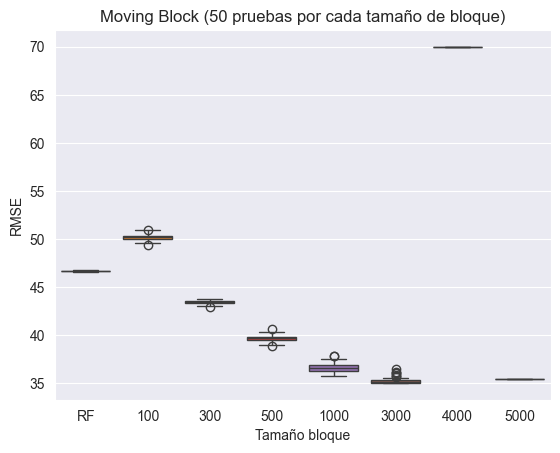

In [85]:
data0 = []
for r in precisionMovingBlock[100]:
    data0.append(r)
data1 = []
for r in precisionMovingBlock[300]:
    data1.append(r)
data2 = []
for r in precisionMovingBlock[500]:
    data2.append(r)
data3 = []
for r in precisionMovingBlock[1000]:
    data3.append(r)
data4 = []
for r in precisionMovingBlock[3000]:
    data4.append(r)
data5 = []
for r in precisionMovingBlock[4000]:
    data5.append(r)
data6 = []
for r in precisionMovingBlock[5000]:
    data6.append(r)

all_arr1 = [basicRFPrecision,
           data0,
           data1,
           data2,
           data3,
           data4,
           data5,
           data6]
sns.boxplot(data=all_arr1)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], ["RF", "100", "300", "500", "1000", "3000", "4000", "5000"])
plt.title("Moving Block (50 pruebas por cada tamaño de bloque)")
plt.xlabel("Tamaño bloque")
plt.ylabel("RMSE")

In [78]:
precisionCircularBlock = dict()
for i in [100, 300, 500, 1000, 3000, 4000, 5000]:
    precisionCircularBlock[i] = []
    block_size = i #int(count_row // i)
    for k in range(50):
        rfts = RandomForestForTimeSeriesRegressor(n_jobs=100, n_estimators=500, block_size=block_size, max_depth=10, block_type=BLOCK_TYPES[2])
        rfts.fit(X_train, Y_train)
        y_pred = rfts.predict(X_test)
        rmse0 = sqrt(mean_squared_error(Y_test, y_pred))
        print(f"RMSE: ({i}, {k})")
        print(rmse0)
        precisionCircularBlock[i].append(rmse0)

RMSE: (100, 0)
49.94322785904554
RMSE: (100, 1)
50.83604853682581
RMSE: (100, 2)
50.16116234333326
RMSE: (100, 3)
50.29476509029604
RMSE: (100, 4)
50.73011511034013
RMSE: (100, 5)
49.8601541050331
RMSE: (100, 6)
50.0421547029471
RMSE: (100, 7)
49.71942645496597
RMSE: (100, 8)
49.622716410209044
RMSE: (100, 9)
50.35740415096139
RMSE: (100, 10)
50.96530404842351
RMSE: (100, 11)
50.366203151849035
RMSE: (100, 12)
49.92415094629732
RMSE: (100, 13)
50.54234919581145
RMSE: (100, 14)
49.93553993498591
RMSE: (100, 15)
49.82913164382747
RMSE: (100, 16)
50.112348827361345
RMSE: (100, 17)
50.004166236910706
RMSE: (100, 18)
50.34610078357151
RMSE: (100, 19)
50.06184143899202
RMSE: (100, 20)
50.25325709350508
RMSE: (100, 21)
50.66855724732716
RMSE: (100, 22)
50.45174276180548
RMSE: (100, 23)
50.409010006143866
RMSE: (100, 24)
49.78097125976748
RMSE: (100, 25)
50.36084727144299
RMSE: (100, 26)
50.413555786315435
RMSE: (100, 27)
50.21365329895368
RMSE: (100, 28)
49.75527436032683
RMSE: (100, 29)
49.3

Text(0, 0.5, 'RMSE')

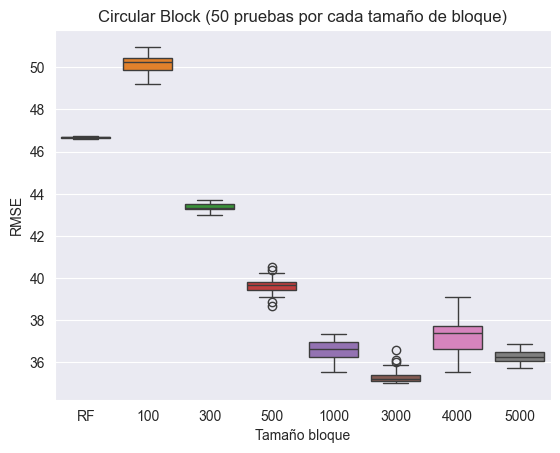

In [79]:
data0 = []
for r in precisionCircularBlock[100]:
    data0.append(r)
data1 = []
for r in precisionCircularBlock[300]:
    data1.append(r)
data2 = []
for r in precisionCircularBlock[500]:
    data2.append(r)
data3 = []
for r in precisionCircularBlock[1000]:
    data3.append(r)
data4 = []
for r in precisionCircularBlock[3000]:
    data4.append(r)
data5 = []
for r in precisionCircularBlock[4000]:
    data5.append(r)
data6 = []
for r in precisionCircularBlock[5000]:
    data6.append(r)

all_arr2 = [basicRFPrecision,
           data0,
           data1,
           data2,
           data3,
           data4,
           data5,
           data6]
sns.boxplot(data=all_arr2)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], ["RF", "100", "300", "500", "1000", "3000", "4000", "5000"])
plt.title("Circular Block (50 pruebas por cada tamaño de bloque)")
plt.xlabel("Tamaño bloque")
plt.ylabel("RMSE")

Text(37.722222222222214, 0.5, 'RMSE')

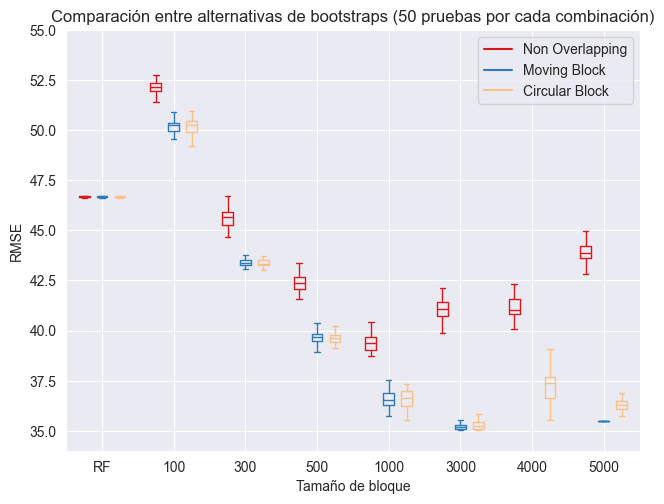

In [87]:
import numpy as np

ticks = ["RF", "100", "300", "500", "1000", "3000", "4000", "5000"]
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()

bp0 = plt.boxplot(all_arr, positions=np.array(range(len(all_arr)))*2.0-0.5, sym='', widths=0.3)
bp1 = plt.boxplot(all_arr1, positions=np.array(range(len(all_arr1)))*2.0, sym='', widths=0.3)
bp2 = plt.boxplot(all_arr2, positions=np.array(range(len(all_arr1)))*2.0+0.5, sym='', widths=0.3)
set_box_color(bp0, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bp1, '#2C7BB6')
set_box_color(bp2, '#fdc086')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Non Overlapping')
plt.plot([], c='#2C7BB6', label='Moving Block')
plt.plot([], c='#fdc086', label='Circular Block')
plt.legend()

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
# plt.xlim(-2, len(ticks)*2)
plt.ylim(34, 55)
plt.tight_layout()
plt.title("Comparación entre alternativas de bootstraps (50 pruebas por cada combinación)")
plt.xlabel("Tamaño de bloque")
plt.ylabel("RMSE")